#### Tool

In [12]:
import shutil
from imutils import paths
import random
import os

Hoặc là giữ nguyên nhãn của dataset hiện tại hoặc là rename lại 

Rename bằng code hoặc bẳng tay đều được , chọn tất cả ảnh và rename để tên file bắt đầu bằng nhãn 
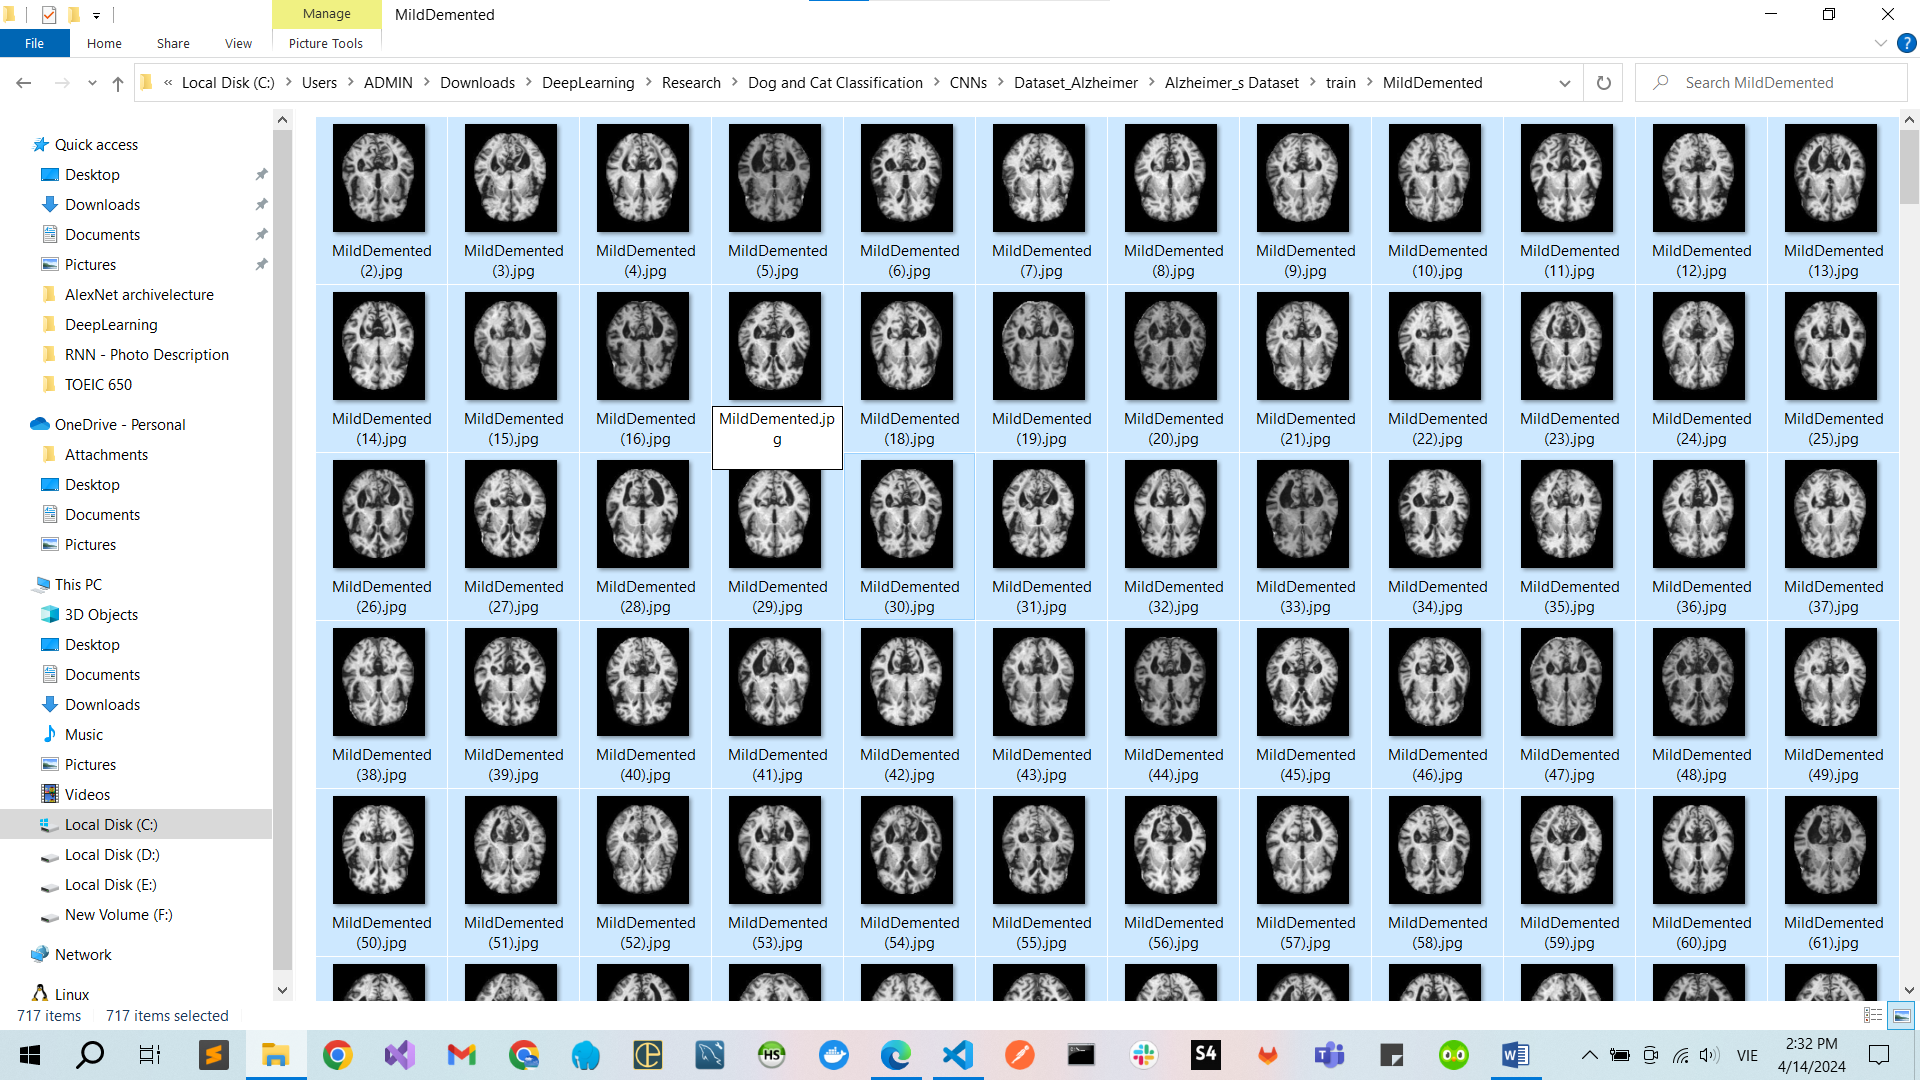

In [15]:
# Đường dẫn đến thư mục chứa các ảnh
folder_path = r"Dataset_Alzheimer\Alzheimer_s Dataset\train\NonDemented"

# Lặp qua từng file trong thư mục
for filename in os.listdir(folder_path):
    # Tạo đường dẫn đầy đủ đến file
    file_path = os.path.join(folder_path, filename)
    
    # Kiểm tra nếu đây là một file ảnh (có thể cần kiểm tra phần mở rộng của file)
    if os.path.isfile(file_path):
        # Tạo tên mới bằng cách thêm "MildDemented" ở đầu
        new_filename = "MildDemented." + filename
        
        # Tạo đường dẫn mới cho file sau khi đổi tên
        new_file_path = os.path.join(folder_path, new_filename)
        
        # Đổi tên file
        os.rename(file_path, new_file_path)

Gom toàn bộ ảnh vào 1 folder 

In [23]:
import shutil
from imutils import paths
import random
import os

# Lấy các đường dẫn đến ảnh
image_paths = list(paths.list_images(r'Dataset\Alzheimer_s Dataset\train'))

# Đổi vị trí ngẫu nhiên các đường dẫn ảnh
random.shuffle(image_paths)

# Chỉ lấy 5000 dòng đầu tiên (5000 ảnh)
selected_image_paths = image_paths[:5121]

# Thư mục đích để sao chép
destination_folder = 'Dataset_Alzheimer_6400'

# Tạo thư mục đích nếu nó không tồn tại
if not os.path.exists(destination_folder):
    os.makedirs(destination_folder)

# Sao chép các tệp ảnh vào thư mục đích
for image_path in selected_image_paths:
    filename = os.path.basename(image_path)
    destination_path = os.path.join(destination_folder, filename)
    shutil.copyfile(image_path, destination_path)

print("Sao chép hoàn tất.")

Sao chép hoàn tất.


#### UnZip and Create Folder 

- File .zip sẽ là file chứa toàn bộ các ảnh tên của ảnh là nhãn ví dụ cat.1.jpg ; cat.2.jpg ; dot.1.jpg,...
- Tạo một folder Dataset ngang hàng với file này , cho vào đó file .zip chứa toàn bộ các ảnh 
- Chạy file nó sẽ giải nén và tạo ra các folder train , val , test 
- LƯU Ý : Cần chỉnh lại : labels = ['mild', 'moderate', 'non', 'verymild'] đúng với các nhãn của tập dữ liệu 


In [24]:
import os
import shutil
import random
import zipfile

# Giải nén tệp data_500.zip vào thư mục data_500
data_zip_path = 'Dataset/dataset_2000.zip'
data_dir = 'Dataset/Dataset_Alzheimer_6400'
root_dir = 'Dataset/Dataset_Alzheimer_6400'

# with zipfile.ZipFile(data_zip_path, 'r') as zip_ref:
#     zip_ref.extractall(root_dir)

# Đường dẫn tới thư mục con 'train', 'val' và 'test'
train_dir = os.path.join(root_dir, 'train')
val_dir = os.path.join(root_dir, 'val')
test_dir = os.path.join(root_dir, 'test')

# Tạo các thư mục con 'train', 'val' và 'test'
os.makedirs(train_dir, exist_ok=True)
os.makedirs(val_dir, exist_ok=True)
os.makedirs(test_dir, exist_ok=True)

# Danh sách các nhãn
labels = ['MildDemented', 'ModerateDemented', 'NonDemented', 'VeryMildDemented'] 

# Tỷ lệ train:val:test
train_ratio = 0.7
val_ratio = 0.2
test_ratio = 0.1

# Lặp qua các nhãn
for label in labels:
    # Tạo các thư mục con 'dog' và 'cat' trong 'train', 'val' và 'test'
    os.makedirs(os.path.join(train_dir, label), exist_ok=True)
    os.makedirs(os.path.join(val_dir, label), exist_ok=True)
    os.makedirs(os.path.join(test_dir, label), exist_ok=True)

    # Đường dẫn tới các tệp thuộc nhãn hiện tại
    label_files = [file for file in os.listdir(data_dir) if file.startswith(label)]
    print(data_dir)
    print(label_files)
    
    # Sắp xếp ngẫu nhiên các tệp
    random.shuffle(label_files)

    # Số lượng tệp trong từng thư mục con
    num_files = len(label_files)
    num_train = int(num_files * train_ratio)
    num_val = int(num_files * val_ratio)
    num_test = num_files - num_train - num_val

    # Chia các tệp vào các thư mục con tương ứng
    train_files = label_files[:num_train]
    val_files = label_files[num_train:num_train + num_val]
    test_files = label_files[num_train + num_val:]

    for file in train_files:
        src = os.path.join(data_dir, file)
        dst = os.path.join(train_dir, label, file)
        shutil.copy2(src, dst)

    for file in val_files:
        src = os.path.join(data_dir, file)
        dst = os.path.join(val_dir, label, file)
        shutil.copy2(src, dst)

    for file in test_files:
        src = os.path.join(data_dir, file)
        dst = os.path.join(test_dir, label, file)
        shutil.copy2(src, dst)


Dataset/Dataset_Alzheimer_6400
['MildDemented (1).jpg', 'MildDemented (100).jpg', 'MildDemented (101).jpg', 'MildDemented (102).jpg', 'MildDemented (103).jpg', 'MildDemented (104).jpg', 'MildDemented (105).jpg', 'MildDemented (106).jpg', 'MildDemented (107).jpg', 'MildDemented (108).jpg', 'MildDemented (109).jpg', 'MildDemented (110).jpg', 'MildDemented (111).jpg', 'MildDemented (112).jpg', 'MildDemented (113).jpg', 'MildDemented (114).jpg', 'MildDemented (115).jpg', 'MildDemented (116).jpg', 'MildDemented (117).jpg', 'MildDemented (118).jpg', 'MildDemented (119).jpg', 'MildDemented (120).jpg', 'MildDemented (121).jpg', 'MildDemented (122).jpg', 'MildDemented (123).jpg', 'MildDemented (124).jpg', 'MildDemented (125).jpg', 'MildDemented (126).jpg', 'MildDemented (127).jpg', 'MildDemented (128).jpg', 'MildDemented (129).jpg', 'MildDemented (130).jpg', 'MildDemented (131).jpg', 'MildDemented (132).jpg', 'MildDemented (133).jpg', 'MildDemented (134).jpg', 'MildDemented (135).jpg', 'MildDem